# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy`

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

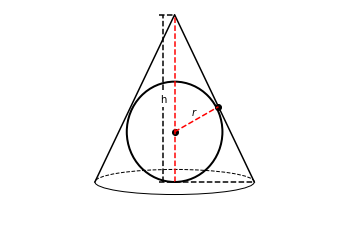

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.
2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$.
3. ¿Cuál es el volumen mínimo del cono?

# 1) Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.

Esta es la formula que utilice para el volumen 
- $ V = \frac{ \pi r^2 h }{3} $





## Procedimiento

Primero se desea minimizar el volumen del cono


Remplazamos los valores de las variables que ya conocemos a $2$
$$ V(x, y) = \frac{\pi}{3} x^2 (y + 2) $$

Donde:

 $ h = y + 2 $
 $ r = x $

Reescribimos argumentos usando trigonometria para obtener una planteamiento factible

$$ \frac{x}{2} = \frac{y + 2}{\sqrt{y^2 - 4}} $$

Despejamos la variable $x$:

$$ x = \frac{2(y + 2)}{\sqrt{y^2 - 4}} $$

Elevamos al cuadrado los terminos de la ecuación que este caso estan remplazando x

$$ x^2 = \frac{4(y + 2)^2}{y^2 -4} $$

Se procede a simplificar terminos

$$ x^2 = \frac{4(y + 2)}{y - 2} $$

Una vez que ya tenemos x, esta se sustituye en la función de volumen, por tanto la función de volumen solo presenta una variable $y$.

Ahora volvemos a la fórmula del volumen del cono:

$$ V = f(x, y) = \frac{\pi}{3} x^2 (y + 2) $$


Con lo obtenido, conseguimos la siguiente funcion que esta solo en un termino, por lo que ya se puede empezar a minimizar 

$$ V(y) = \frac{1}{3}\pi  \frac{4(y + 2)^2}{y - 2} $$





In [26]:
# Se importan librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
sp.var("r")
sp.var("y")
sp.var("x")

x

In [48]:
def funcion_minimizar(y) : 
    return (sp.pi/3 * (4*(y+2)**2)/(y - 2))

funcion_minimizar(y)


4*pi*(y + 2)**2/(3*(y - 2))

In [46]:
derivada_de_cono = sp.diff(funcion_minimizar(y), y)
derivada_de_cono

4*pi*(2*y + 4)/(3*(y - 2)) - 4*pi*(y + 2)**2/(3*(y - 2)**2)

In [45]:
puntos_criticos = pc = sp.solve(dV, y)[1]
puntos_criticos 

6

In [49]:
segunda_derivada_de_cono = sp.diff(derivada_de_cono, y)
segunda_derivada_de_cono

8*pi/(3*(y - 2)) - 8*pi*(2*y + 4)/(3*(y - 2)**2) + 8*pi*(y + 2)**2/(3*(y - 2)**3)

In [52]:
solucion = segunda_derivada_de_cono.subs(y, puntos_criticos)
solucion

2*pi/3

In [56]:
solucion2 = round(segunda_derivada_de_cono.subs(y, puntos_criticos), 2)
solucion2

2.09

In [57]:
#Con los siguientes datos ya podemos calcular la altura

altura = puntos_criticos + 2
altura

8

---
# Segundo punto. Programación lineal

Un empresario pretende fabricar dos tipos de congeladores denominados A y B. Cada uno de ellos debe pasar por tres operaciones antes de su comercialización: 
<table>
  <tr>
      <th></th>
      <th>Ensamblaje</th>
      <th>Pintura</th>
      <th>Calidad</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>2.5 horas</td>
      <td>3 kg</td>
      <td>14 horas</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Congeladores tipo B</th>
      <td>3 horas</td>
      <td>6 kg</td>
      <td>10 horas</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td>4500 horas</td>
      <td>8400 kg</td>
      <td>20000 horas</td>
  </tr>
</table>

El empresario dispone semanalmente de:

* Máximo 4500 horas para ensamblaje
* Máximo 8400 Kg. de esmalte
* 20000 horas máximo, para control de calidad

Los costos totales de fabricación por unidad son, respectivamente, 30 y 28, y los precios de venta 52 y 48, todos ellos en miles de pesos. Además, los estudios de mercado muestran que la demanda semanal de congeladores no supera las 1700 unidades y que, en particular, la de tipo A es de, al menos 600 unidades.

<table>
  <tr>
      <th></th>
      <th>Costo</th>
      <th>Precio de venta</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>30</td>
      <td>52</td>
  </tr>
  <tr>
      <th>Congeladores tipo B</th>
      <td>28</td>
      <td>48</td>
  </tr>
</table>

Se desea conocer las unidades necesarias para **maximizar** la utilidad.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos congeladores de cada tipo se deben producir (valores enteros)?, ¿Cuál es la ganancia?

In [15]:
import scipy.optimize as opt

In [16]:
c = np.array([-22, -20])

A = np.array ([
    [2.5, 3],
    [3, 6],
    [14, 10],
    [1, 1],
    [-1, 0]
])

b = np.array([
    4500,
    8400,
    20000,
    1700,
    -600,
])


In [17]:
sol = opt.linprog(c, A, b)
sol

     con: array([], dtype=float64)
     fun: -34705.87899796842
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([4.65957899e-04, 1.16470672e+03, 1.81731643e-03, 5.29413396e+01,
       2.82352895e+02])
  status: 0
 success: True
       x: array([882.35289457, 764.70576588])

---
# Tercer punto. Ajuste de curvas
Los siguientes datos extraidos de la Federal Reserve Economic Data (FRED), son los salarios por empleado equivalente a tiempo completo en industrias privadas de EE.UU.: fondos, fideicomisos, etc. **entre los años 1998 y 2018**. 

https://www.quandl.com/data/FRED/N4461C0A052NBEA-Wage-and-salary-accruals-per-full-time-equivalent-employee-Domestic-private-industries-Funds-trusts-and-other-financial-vehicles 

In [98]:
import numpy as np
y=np.array([ 55887.,  59365.,  65435.,  68065.,  71918.,  77257.,  92036.,
        92645.,  99857.,  74935.,  78597.,  83134.,  87372., 104196.,
       112597., 133821., 129107., 138259., 139083., 143762., 147334.])
x=np.arange(8,29)

In [99]:
len(y)

21

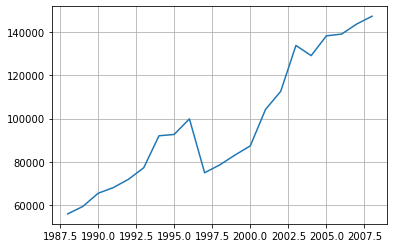

In [100]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste los salarios con polinomios de grado 1 a 3 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste
3. Use el modelo para averiguar el salario a mediados del año 2005 y para predecirlo en el año 2025. ¿Qué diferencias encuentra en cuanto a la interpolación (esto es, obtener un punto medio) y la extrapolación  (es decir, obtener un dato fuera del rango conocido)?

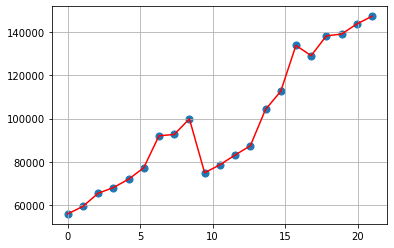

In [101]:
m = 21
x = np.linspace(0, 21, m)
y = y

plt.figure()
plt.scatter(x, y, s=50)
plt.plot(x, y, "r")
plt.grid()




In [102]:
import scipy.optimize as opt

In [103]:
def funcion_de_salario_1(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]


In [104]:
ones = np.ones ([m, 1])
x_1 = np.reshape(x, [m, -1])

X = np.hstack((ones, x_1))
X

array([[ 1.  ,  0.  ],
       [ 1.  ,  1.05],
       [ 1.  ,  2.1 ],
       [ 1.  ,  3.15],
       [ 1.  ,  4.2 ],
       [ 1.  ,  5.25],
       [ 1.  ,  6.3 ],
       [ 1.  ,  7.35],
       [ 1.  ,  8.4 ],
       [ 1.  ,  9.45],
       [ 1.  , 10.5 ],
       [ 1.  , 11.55],
       [ 1.  , 12.6 ],
       [ 1.  , 13.65],
       [ 1.  , 14.7 ],
       [ 1.  , 15.75],
       [ 1.  , 16.8 ],
       [ 1.  , 17.85],
       [ 1.  , 18.9 ],
       [ 1.  , 19.95],
       [ 1.  , 21.  ]])

In [105]:
beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

In [106]:
funcion_de_salario_1(beta_inicial, X, y)


219007269214.60303

In [107]:
solucion_1 = opt.minimize(funcion_de_salario_1, beta_inicial, args=(X, y))
solucion_1

      fun: 2247933179.484002
 hess_inv: array([[ 0.08999368, -0.00624765],
       [-0.00624765,  0.00059188]])
      jac: array([ 0., 64.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 146
      nit: 5
     njev: 45
   status: 2
  success: False
        x: array([52638.52645781,  4305.05611886])

In [108]:
y_pred_1 = X @ solucion_1.x
y_pred_1

array([ 52638.52645781,  57158.83538261,  61679.14430741,  66199.45323221,
        70719.762157  ,  75240.0710818 ,  79760.3800066 ,  84280.6889314 ,
        88800.9978562 ,  93321.306781  ,  97841.6157058 , 102361.9246306 ,
       106882.23355539, 111402.54248019, 115922.85140499, 120443.16032979,
       124963.46925459, 129483.77817939, 134004.08710419, 138524.39602898,
       143044.70495378])

In [109]:
def funcion_de_salario_2(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]


In [110]:
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])

X = np.hstack((ones, x_1, x_2))
X

array([[  1.    ,   0.    ,   0.    ],
       [  1.    ,   1.05  ,   1.1025],
       [  1.    ,   2.1   ,   4.41  ],
       [  1.    ,   3.15  ,   9.9225],
       [  1.    ,   4.2   ,  17.64  ],
       [  1.    ,   5.25  ,  27.5625],
       [  1.    ,   6.3   ,  39.69  ],
       [  1.    ,   7.35  ,  54.0225],
       [  1.    ,   8.4   ,  70.56  ],
       [  1.    ,   9.45  ,  89.3025],
       [  1.    ,  10.5   , 110.25  ],
       [  1.    ,  11.55  , 133.4025],
       [  1.    ,  12.6   , 158.76  ],
       [  1.    ,  13.65  , 186.3225],
       [  1.    ,  14.7   , 216.09  ],
       [  1.    ,  15.75  , 248.0625],
       [  1.    ,  16.8   , 282.24  ],
       [  1.    ,  17.85  , 318.6225],
       [  1.    ,  18.9   , 357.21  ],
       [  1.    ,  19.95  , 398.0025],
       [  1.    ,  21.    , 441.    ]])

In [111]:
beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

In [112]:
funcion_de_salario_2(beta_inicial, X, y)

218638640542.86456

In [113]:
solucion_2 = opt.minimize(funcion_de_salario_2, beta_inicial, args=(X,y))
solucion_2

      fun: 1818616347.0198011
 hess_inv: array([[ 1.70498943e-01, -3.17311456e-02,  1.23034516e-03],
       [-3.17311456e-02,  8.45076728e-03, -3.77068657e-04],
       [ 1.23034516e-03, -3.77068657e-04,  1.80698593e-05]])
      jac: array([  0.,   0., -32.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 131
      nit: 9
     njev: 30
   status: 2
  success: False
        x: array([61399.10260325,  1670.06009684,   125.47755105])

In [114]:
y_pred_2 = X @ solucion_2.x
y_pred_2

array([ 61399.10260325,  63291.00470496,  65459.58480675,  67904.8429086 ,
        70626.77901053,  73625.39311253,  76900.6852146 ,  80452.65531673,
        84281.30341894,  88386.62952122,  92768.63362357,  97427.31572599,
       102362.67582848, 107574.71393105, 113063.43003368, 118828.82413638,
       124870.89623915, 131189.646342  , 137785.07444491, 144657.1805479 ,
       151805.96465095])

In [115]:
def funcion_de_salario_3(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [116]:
ones = np.ones ([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])

X = np.hstack((ones, x_1, x_2, x_3))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.05000000e+00, 1.10250000e+00, 1.15762500e+00],
       [1.00000000e+00, 2.10000000e+00, 4.41000000e+00, 9.26100000e+00],
       [1.00000000e+00, 3.15000000e+00, 9.92250000e+00, 3.12558750e+01],
       [1.00000000e+00, 4.20000000e+00, 1.76400000e+01, 7.40880000e+01],
       [1.00000000e+00, 5.25000000e+00, 2.75625000e+01, 1.44703125e+02],
       [1.00000000e+00, 6.30000000e+00, 3.96900000e+01, 2.50047000e+02],
       [1.00000000e+00, 7.35000000e+00, 5.40225000e+01, 3.97065375e+02],
       [1.00000000e+00, 8.40000000e+00, 7.05600000e+01, 5.92704000e+02],
       [1.00000000e+00, 9.45000000e+00, 8.93025000e+01, 8.43908625e+02],
       [1.00000000e+00, 1.05000000e+01, 1.10250000e+02, 1.15762500e+03],
       [1.00000000e+00, 1.15500000e+01, 1.33402500e+02, 1.54079888e+03],
       [1.00000000e+00, 1.26000000e+01, 1.58760000e+02, 2.00037600e+03],
       [1.00000000e+00, 1.36500000e+01, 1.86322500e

In [117]:
beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])


In [118]:
funcion_de_salario_3(beta_inicial, X, y)


216183136068.61713

In [119]:
solucion_3 = opt.minimize(funcion_de_salario_3, beta_inicial, args=(X, y))
solucion_3

      fun: 1746809636.5912142
 hess_inv: array([[ 7.41915807e-05, -3.15321978e-05,  5.70092334e-05,
        -3.70906171e-06],
       [-3.15321978e-05,  1.34024552e-05, -2.42320020e-05,
         1.57576244e-06],
       [ 5.70092334e-05, -2.42320020e-05,  4.38152528e-05,
        -2.84840983e-06],
       [-3.70906171e-06,  1.57576244e-06, -2.84840983e-06,
         1.85845611e-07]])
      jac: array([    0.,    32.,   -64., -1296.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 635
      nit: 56
     njev: 127
   status: 2
  success: False
        x: array([ 5.77297805e+04,  4.06393010e+03, -1.66591063e+02,  9.27240912e+00])

In [120]:
y_pred_3 = X @ solucion_3.x
y_pred_3 

array([ 57729.78045477,  61823.97438479,  65615.2388569 ,  69167.97770674,
        72546.59476995,  75815.49388218,  79039.07887907,  82281.75359627,
        85607.9218694 ,  89081.98753412,  92768.35442606,  96731.42638088,
       101035.6072342 , 105745.30082168, 110924.91097895, 116638.84154166,
       122951.49634545, 129927.27922596, 137630.59401884, 146125.84455972,
       155477.43468424])

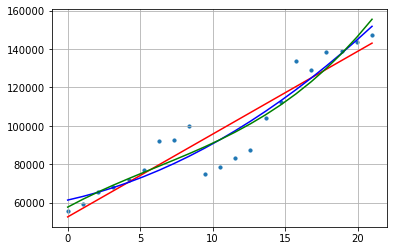

In [121]:
m = 21

x = np.linspace(0, 21, m )
y = y

plt.figure()
plt.scatter(x, y, s=10)
plt.plot(x, y_pred_1, "r")
plt.plot(x, y_pred_2, "b")
plt.plot(x, y_pred_3, "g")
plt.grid()


El polinomio que mejor se ajusta es el x_3, que corresponde al color verde 

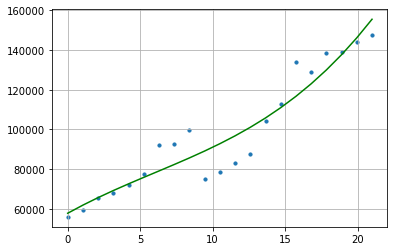

In [122]:
m = 21

x = np.linspace(0, 21, m )
y = y

plt.figure()
plt.scatter(x, y, s=10)
plt.plot(x, y_pred_3, "g")
plt.grid()

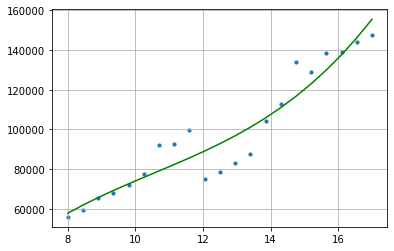

In [123]:
m = 21

x = np.linspace(8, 17, m )
y = y

plt.figure()
plt.scatter(x, y, s=10)
plt.plot(x, y_pred_3, "g")
plt.grid()

#Como el primer dato es 1998 y corresponde al 1, el dato de 2005 = 8, y 2025 = 17

In [128]:
y_pred_3[8] #Prediccion en 2005

85607.92186939906

In [125]:
y_pred_3[17] #Valor en 2025

129927.27922596304